In [121]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as ols

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns

In [123]:
boston = pd.read_csv("house_price.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [125]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [127]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [129]:
# 사용하지 않을 변수 drop
boston.drop(labels="CAT.MEDV",axis=1,inplace=True)
#boston.drop(labels=["CHAS", "RM"],axis=1,inplace=True)
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [131]:
#독립변수 / 종속변수 (집값)
X_s = boston.drop(labels = 'MEDV', axis = 1)
y = boston["MEDV"]

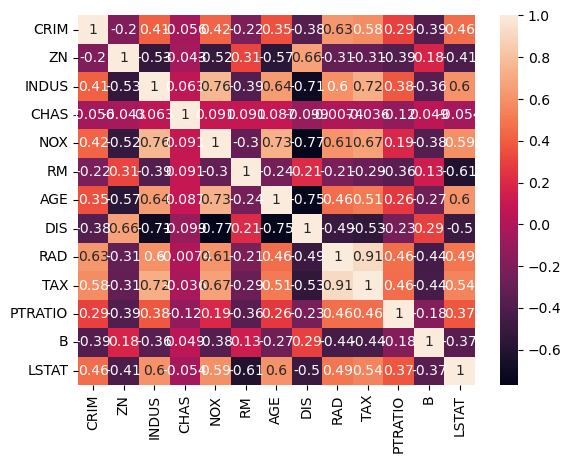

In [133]:
sns.heatmap(X_s.corr(), annot = True)
plt.show()

- 0.9 이상의 매우 강한 상관관계 ~ RAD - TAX
- RAD: 방사형 고속도로까지의 거리 / TAX: 재산세율

In [134]:
print(X_s.loc[:,["RAD", "TAX"]])
print(X_s["RAD"].unique())
print(X_s["TAX"].unique())

     RAD  TAX
0      1  296
1      2  242
2      2  242
3      3  222
4      3  222
..   ...  ...
501    1  273
502    1  273
503    1  273
504    1  273
505    1  273

[506 rows x 2 columns]
[ 1  2  3  5  4  8  6  7 24]
[296 242 222 311 307 279 252 233 243 469 226 313 256 284 216 337 345 305
 398 281 247 270 276 384 432 188 437 403 193 265 255 329 402 348 224 277
 300 330 315 244 264 223 254 198 285 241 293 245 289 358 304 287 430 422
 370 352 351 280 335 411 187 334 666 711 391 273]


- 두 변수간의 상관관계는 높은데 어떻게 처리해야할지 모르겠다. PCA 분석? 
- 하나를 삭제하기로! ~ VIF가 더 높은 변수를 삭제한다. 

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X_s)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [136]:
# 먼저 corr 높은 RAD-TAX 중 VIF 높은 것 TAX 삭제
vif(X_s.drop(['TAX'], axis = 1))

   Features        VIF
0      CRIM   2.100323
1        ZN   2.697230
2     INDUS  11.743319
3      CHAS   1.136630
4       NOX  71.972959
5        RM  77.946536
6       AGE  21.377489
7       DIS  14.641579
8       RAD   5.599479
9   PTRATIO  82.355181
10        B  20.104332
11    LSTAT  11.098281


In [137]:
# 이후 VIF가 높은 column들을 삭제
vif(X_s.drop(['TAX','PTRATIO'], axis = 1))

   Features        VIF
0      CRIM   2.099343
1        ZN   2.375220
2     INDUS  11.158724
3      CHAS   1.120106
4       NOX  71.923884
5        RM  59.969882
6       AGE  21.345067
7       DIS  11.942251
8       RAD   5.175102
9         B  18.554685
10    LSTAT  10.081165


In [138]:
vif(X_s.drop(['NOX','TAX','PTRATIO'], axis = 1))

  Features        VIF
0     CRIM   2.097466
1       ZN   2.375219
2    INDUS   9.290080
3     CHAS   1.118613
4       RM  39.069063
5      AGE  19.780944
6      DIS  11.817803
7      RAD   4.965633
8        B  18.289917
9    LSTAT   9.046248


In [139]:
vif(X_s.drop(['RM','NOX','TAX','PTRATIO'], axis = 1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


In [140]:
X_new = X_s.drop(['RM','NOX','TAX','PTRATIO'], axis = 1)

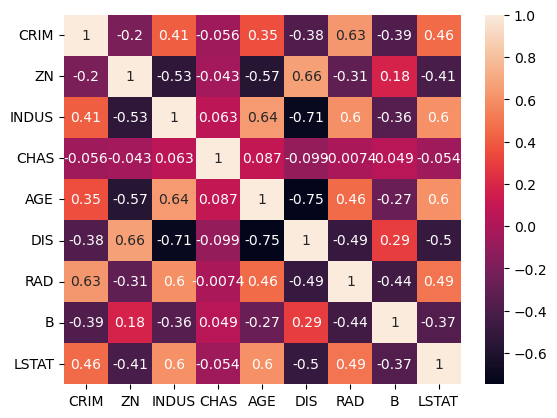

In [141]:
# 다시 상관 관계
sns.heatmap(X_new.corr(), annot = True)
plt.show()

#### 독립 변수 중 상관계수가 - 0.7 이하로 상관정도가 강한 DIS-INDUS / DIS-AGE을 처리하고 싶다. 
#### 근데 DIS column은 공통되고 INDUS-AGE 간의 상관계수는 그렇게 크지 않은데 병합하거나 삭제해도 되나? 
DIS: 직업센터의 거리 / INDUS: 비소매상업지역 면적 비율 / AGE: 1940년 이전에 건축된 주택의 비율
종속변수: MEDV

In [142]:
X_check = X_new.loc[:, ["DIS","INDUS","AGE"]]
display(X_check)

,DIS,INDUS,AGE
0,4.0900,2.31,65.2
1,4.9671,7.07,78.9
2,4.9671,7.07,61.1
3,6.0622,2.18,45.8
4,6.0622,2.18,54.2
...,...,...,...
501,2.4786,11.93,69.1
502,2.2875,11.93,76.7
503,2.1675,11.93,91.0
504,2.3889,11.93,89.3


#### 변수 변환

In [148]:
# DIS를 살려두면서 INDUS / AGE로 나누어 병합해보았다. 맞는지는 모르겠다...
X_new["DIS_INDUS_ratio"] = X_new["DIS"] / X_new["INDUS"]
X_new["DIS_AGE_ratio"] = X_new["DIS"] / X_new["AGE"]
X_new = X_new.drop(["DIS", "INDUS", "AGE"], axis = 1)

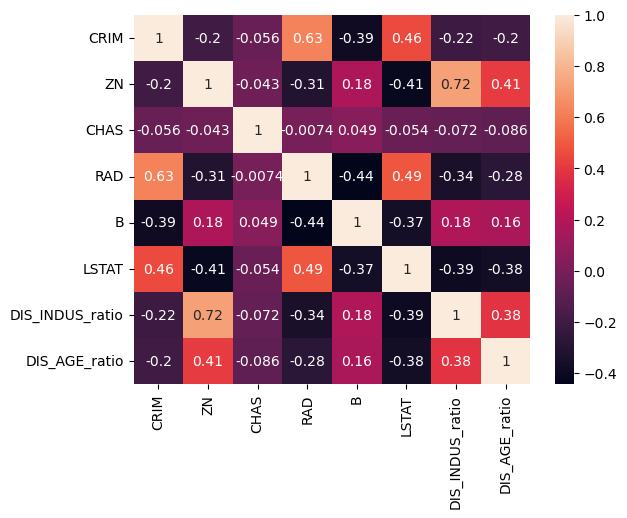

In [152]:
# 다시 상관 관계
sns.heatmap(X_new.corr(), annot = True)
plt.show()

사이킷런의 train_test_split으로 훈련 데이터, 테스트용 데이터 구성

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 2021)

### 1) Sklearn으로 다중회귀

In [163]:
lr_skl = LinearRegression()
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)
y_pred_skl

array([23.15864521, 18.65481134, 23.14223131, 13.63314629, 32.20517996,
       22.38391866, 25.45516585, 30.01210492, 25.33497879, 28.85033499,
       35.35605722, 26.01891444, 16.96236043, 29.4124631 , 29.58205642,
       24.34860276, 22.61659528,  7.33604716,  4.8554496 , 29.6014902 ,
       25.06634607, 13.92383512, 16.97444191, 28.31518758, 16.28018183,
       14.88307764, 20.02690759, 27.32561812, 22.64347111, 16.94894599,
       20.03590655, 32.41520638, 14.21587417, 24.64823836, 31.18204281,
       17.37047432, 28.85021442, 16.42774416, 32.21693063, 26.65569295,
       19.13075191, 26.18524987, 31.14981144, 29.71302948,  4.38323911,
       27.745833  , 24.52070646, 24.82622858, 24.77191967, 28.65988039,
       17.79328438, 27.91311772, 25.21107992, 28.58446957, 18.40537902,
       21.50632318, 27.39770778, 22.30299683, 30.47763271, 25.49546973,
       30.03448391, 25.9639917 , 10.26397557, 23.7057465 , 25.23276646,
       22.56005866, 25.3017687 , 27.38002917, 22.28574838,  2.04

#### 모델 평가

In [189]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred_skl)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred_skl)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_pred_skl)))

Testing MSE: 34.522
Testing MAE: 4.124
Testing R2: 0.460


이 회귀모델은 test 데이터에 대해 46% 정도의 설명력을 보여준다.

In [192]:
### 2) statsmodels의 OLS 모듈로 선형회귀 모델 구축

In [194]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

#### 모델 평가

In [197]:
print(model_trained.summary())  

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     74.07
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           7.34e-74
Time:                        01:20:34   Log-Likelihood:                -1296.2
No. Observations:                 404   AIC:                             2610.
Df Residuals:                     395   BIC:                             2646.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              31.1549      1.780     

no.observations: 총 표본수 404 / DF Residuals: 잔차 자유도 395 / DF Model: 독립 변수 개수 8
R-Square, F-Statistic, AIC, BIC 수치가 모두 좋은 회귀모델이 아니라고 의미하는 것 같다... ㅡ.ㅡ
P-value도 0.05보다 작아야 유의미하다고 하는데 CRIM, RAD, B, DIS_INDUS_ratio에서 0.05를 넘는다. 

In [200]:
# p-value 높은 것들 다 제거 후 다시 모델
model=sm.OLS(y_train, X_train.drop(labels = ['CRIM', 'RAD', 'B', 'DIS_INDUS_ratio'], axis = 1))
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.43e-76
Time:                        01:20:34   Log-Likelihood:                -1299.7
No. Observations:                 404   AIC:                             2609.
Df Residuals:                     399   BIC:                             2629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.3758      0.826     41.634      0.000      32.753      35.999
ZN                0.0440      0.015      2.990      0.003       0.015       0.073
CHAS              5.4879      1.248      4.397      0.000       3.034       7.942
LSTAT            -0.9555      0.049    -19.698      0.000      -1.051      -0.860
DIS_AGE_ratio    -5.6281      2.040     -2.759      0.006      -9.639      -1.617
==============================================================================
Omnibus:                       91.033   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.781
Skew:                           1.261   Prob(JB):                     6.08e-37
Kurtosis:                       4.883   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

회귀모델을 구성하면서 다중공선성과 상관관계를 고려하면서 종속변수를 실습과 다르게 조정했는데
실습 모델보다 수치적으로 성능이 안 좋은 것 같다. 
종속변수를 처리하는 과정이 틀렸거나 고려해야 하는 다른 부분이 있는 듯 하다. 어렵다! ㅜ 